In [1]:
# Playspace Visualization

In [2]:
filepaths = []
player_name = "NtsFranz"

In [3]:
# populates the filepaths
replays_folder = r"C:\Users\Anton\Documents\IgniteBot\replays"
max_files = 50

files_in_folder = os.listdir(replays_folder)
files_in_folder.sort(reverse=True)
count = 0
for file in files_in_folder:
    if count >= max_files:
        break
    full_filename = os.path.join(replays_folder, file)
    if file.endswith('.echoreplay') and os.path.exists(full_filename):
        filepaths.append(full_filename)
        count += 1
print(filepaths)

['C:\\Users\\Anton\\Documents\\IgniteBot\\replays\\rec_2020-12-29_22-06-33.echoreplay', 'C:\\Users\\Anton\\Documents\\IgniteBot\\replays\\rec_2020-12-29_21-54-58.echoreplay', 'C:\\Users\\Anton\\Documents\\IgniteBot\\replays\\rec_2020-12-29_21-44-07.echoreplay', 'C:\\Users\\Anton\\Documents\\IgniteBot\\replays\\rec_2020-12-29_21-31-15.echoreplay', 'C:\\Users\\Anton\\Documents\\IgniteBot\\replays\\rec_2020-12-29_21-19-40.echoreplay', 'C:\\Users\\Anton\\Documents\\IgniteBot\\replays\\rec_2020-12-29_21-00-16.echoreplay', 'C:\\Users\\Anton\\Documents\\IgniteBot\\replays\\rec_2020-12-29_20-51-46.echoreplay', 'C:\\Users\\Anton\\Documents\\IgniteBot\\replays\\rec_2020-12-29_20-27-18.echoreplay', 'C:\\Users\\Anton\\Documents\\IgniteBot\\replays\\rec_2020-12-29_20-15-40.echoreplay', 'C:\\Users\\Anton\\Documents\\IgniteBot\\replays\\rec_2020-12-23_16-36-57.echoreplay', 'C:\\Users\\Anton\\Documents\\IgniteBot\\replays\\rec_2020-12-23_15-47-18.echoreplay', 'C:\\Users\\Anton\\Documents\\IgniteBot\\r

In [4]:
# Imports a replay file

import zipfile
import os
import sys
import tempfile
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
fmt = r'%Y/%m/%d %H:%M:%S.%f'

# extracts the JSON object and the timestamp from a .echoreplay line
def get_frame(line: str):
    timestamp, jsondata = line.split("\t")
    return datetime.datetime.strptime(timestamp, fmt), json.loads(jsondata)


# finds the player object with the given name or returns None
def get_player(json: str, player_name: str):
    for team in json['teams']:
        if 'players' in team:
            for player in team['players']:
                if player['name'] == player_name:
                    player['game_clock'] = json['game_clock']
                    return player
    return None

# exctract the .echoreplay file
data = []
for filepath in filepaths:
    if zipfile.is_zipfile(filepath):
        # Unzip
        with zipfile.ZipFile(filepath, 'r') as zf:
            with tempfile.TemporaryDirectory() as td:
                zf.extractall(td)
                for entry in os.scandir(td):
                    with open(entry.path, 'r') as f:
                        data.extend(f.readlines())
    else:
        with open(filepath) as f:
            data.extend(f.readlines())

    print("Loaded file into memory ({0} lines)".format(len(data)))
print(f"Finished loading ({len(data)} lines total)")

Loaded file into memory (4560 lines)
Loaded file into memory (25080 lines)
Loaded file into memory (44232 lines)
Loaded file into memory (67032 lines)
Loaded file into memory (87552 lines)
Loaded file into memory (104728 lines)
Loaded file into memory (112480 lines)
Loaded file into memory (155800 lines)
Loaded file into memory (176320 lines)
Loaded file into memory (181792 lines)
Loaded file into memory (182856 lines)
Loaded file into memory (186656 lines)
Loaded file into memory (188176 lines)
Loaded file into memory (204440 lines)
Loaded file into memory (228000 lines)
Loaded file into memory (248520 lines)
Loaded file into memory (271776 lines)
Loaded file into memory (292296 lines)
Loaded file into memory (311904 lines)
Loaded file into memory (312208 lines)
Loaded file into memory (397024 lines)
Loaded file into memory (402192 lines)
Loaded file into memory (404320 lines)
Loaded file into memory (412680 lines)
Loaded file into memory (413744 lines)
Loaded file into memory (434264

In [5]:
xyz=['x','y','z']
frames = [get_frame(line)[1] for line in data if len(line) > 800]
print("Loaded JSON frames...")
players = [{xyz[i]: frame['player']['vr_position'][i] for i in range(0, 3)}|frame for frame in frames]
rawDF = pd.DataFrame(players)
display(rawDF.head())

Loaded JSON frames...


,x,y,z,disc,sessionid,orange_team_restart_request,sessionip,game_status,game_clock_display,game_clock,...,orange_points,player,pause,possession,tournament_match,blue_team_restart_request,client_name,blue_points,last_score,teams
0,0.051,-0.043,-0.030,"{'position': [0.0, 4.5360003, -27.500002], 'fo...",5E16A8C8-5D93-4468-9075-42A3367BE2CB,0,34.123.113.75,round_over,10:00.00,600.0,...,18,"{'vr_left': [0.76600003, 0.34900001, 0.5390000...","{'paused_state': 'unpaused', 'unpaused_team': ...","[1, 3]",False,0,NtsFranz,16,"{'disc_speed': 17.382673, 'team': 'orange', 'g...","[{'players': [{'rhand': {'pos': [-1.8320001, -..."
1,0.053,-0.044,-0.030,"{'position': [0.0, 4.5360003, -27.500002], 'fo...",5E16A8C8-5D93-4468-9075-42A3367BE2CB,0,34.123.113.75,round_over,10:00.00,600.0,...,18,"{'vr_left': [0.76300001, 0.35200003, 0.5420000...","{'paused_state': 'unpaused', 'unpaused_team': ...","[1, 3]",False,0,NtsFranz,16,"{'disc_speed': 17.382673, 'team': 'orange', 'g...","[{'players': [{'rhand': {'pos': [-1.9070001, -..."
2,0.054,-0.044,-0.029,"{'position': [0.0, 4.5360003, -27.500002], 'fo...",5E16A8C8-5D93-4468-9075-42A3367BE2CB,0,34.123.113.75,round_over,10:00.00,600.0,...,18,"{'vr_left': [0.76400006, 0.35200003, 0.5410000...","{'paused_state': 'unpaused', 'unpaused_team': ...","[1, 3]",False,0,NtsFranz,16,"{'disc_speed': 17.382673, 'team': 'orange', 'g...","[{'players': [{'rhand': {'pos': [-1.9340001, -..."
3,0.055,-0.045,-0.028,"{'position': [0.0, 4.5360003, -27.500002], 'fo...",5E16A8C8-5D93-4468-9075-42A3367BE2CB,0,34.123.113.75,round_over,10:00.00,600.0,...,18,"{'vr_left': [0.76700002, 0.35200003, 0.5360000...","{'paused_state': 'unpaused', 'unpaused_team': ...","[1, 3]",False,0,NtsFranz,16,"{'disc_speed': 17.382673, 'team': 'orange', 'g...","[{'players': [{'rhand': {'pos': [-1.9590001, -..."
4,0.055,-0.046,-0.028,"{'position': [0.0, 4.5360003, -27.500002], 'fo...",5E16A8C8-5D93-4468-9075-42A3367BE2CB,0,34.123.113.75,round_over,10:00.00,600.0,...,18,"{'vr_left': [0.76900005, 0.35700002, 0.5310000...","{'paused_state': 'unpaused', 'unpaused_team': ...","[1, 3]",False,0,NtsFranz,16,"{'disc_speed': 17.382673, 'team': 'orange', 'g...","[{'players': [{'rhand': {'pos': [-1.9670001, -..."


In [6]:
# Generates a distance for each position

import math
def xyzMagnitude(rowWithXYZ):
    return math.sqrt(rowWithXYZ['x']**2 + rowWithXYZ['y']**2 + rowWithXYZ['z']**2)

def xyzSpeed(x,y,z,x2,y2,z2,deltaTime):
    return math.sqrt((x2-x)**2 + (y2-y)**2 + (z2-z)**2) / deltaTime


df = rawDF

df['dist'] = df.apply(lambda row: xyzMagnitude(row), axis=1)


df['deltaX'] = df['x'].shift(-1) - df['x']
df['deltaY'] = df['y'].shift(-1) - df['y']
df['deltaZ'] = df['z'].shift(-1) - df['z']
df['deltaTime'] = df['game_clock'].shift(-1) - df['game_clock']

df = df[df['deltaTime'] != 0]
df = df[df['deltaTime'] < .1]


length = 900    # 600 ~ 10sec

df['smoothedX'] = df['x'].rolling(length).mean().shift(int(-length/2))
df['smoothedY'] = df['y'].rolling(length).mean().shift(int(-length/2))
df['smoothedZ'] = df['z'].rolling(length).mean().shift(int(-length/2))

df['movedX'] = df['x'] - df['smoothedX']
df['movedY'] = df['y'] - df['smoothedY']
df['movedZ'] = df['z'] - df['smoothedZ']


df['dist_smoothed'] = df['dist'].rolling(length).mean().shift(int(-length/2))
df['movement'] = df.apply(lambda row: (row['dist']-row['dist_smoothed'])/row['deltaTime'], axis=1)

# calculates speed
df['speed'] = df.apply(lambda row: math.sqrt(row['deltaX']**2 + row['deltaY']**2 + row['deltaZ']**2) / row['deltaTime'], axis=1)



# removes non-playing frames only after calculating other values
len_before = len(df)
df = df[df['game_status'] == 'playing']
print(f"Removed {len_before - len(df)} out of {len_before} rows, since they weren't during 'playing'")

df.head()

Removed 133381 out of 410665 rows, since they weren't during 'playing'


,x,y,z,disc,sessionid,orange_team_restart_request,sessionip,game_status,game_clock_display,game_clock,...,deltaTime,smoothedX,smoothedY,smoothedZ,movedX,movedY,movedZ,dist_smoothed,movement,speed
7217,0.050,-0.172,0.564,"{'position': [0.0, 0.0, 0.0], 'forward': [0.00...",5E16A8C8-5D93-4468-9075-42A3367BE2CB,0,34.123.113.75,playing,09:59.97,599.97760,...,-0.02246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.062966
7218,0.049,-0.172,0.565,"{'position': [0.0, 0.0, 0.0], 'forward': [0.00...",5E16A8C8-5D93-4468-9075-42A3367BE2CB,0,34.123.113.75,playing,09:59.95,599.95514,...,-0.04504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.066607
7219,0.047,-0.171,0.563,"{'position': [0.0, 0.0, 0.0], 'forward': [0.00...",5E16A8C8-5D93-4468-9075-42A3367BE2CB,0,34.123.113.75,playing,09:59.91,599.91010,...,-0.02234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.109646
7220,0.045,-0.170,0.562,"{'position': [0.0, 0.0, 0.0], 'forward': [0.00...",5E16A8C8-5D93-4468-9075-42A3367BE2CB,0,34.123.113.75,playing,09:59.88,599.88776,...,-0.04499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.157170
7221,0.042,-0.166,0.557,"{'position': [0.0, 0.0, 0.0], 'forward': [0.00...",5E16A8C8-5D93-4468-9075-42A3367BE2CB,0,34.123.113.75,playing,09:59.84,599.84277,...,-0.02227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.205774


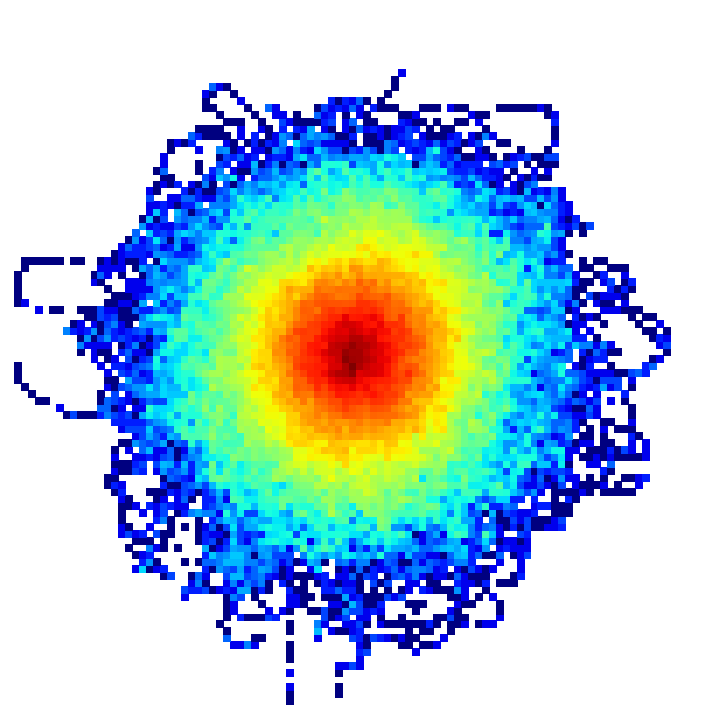

In [18]:
from matplotlib import colors
import matplotlib.patches as patches

colormap='jet'
figscale=1
r=1

fig, ax = plt.subplots(tight_layout=True,figsize=(10*figscale, 10*figscale), frameon=False)
fig.patch.set_visible(False)
# ax.axis('off')
hist = ax.hist2d(df['movedX'], df['movedZ'], 
        bins=(100,100), 
        range=[[-r,r],[-r,r]], 
        norm=colors.LogNorm(), cmap=colormap)

# ft to meters conversion
fourFT = 1.2192
rect = patches.Rectangle((-fourFT/2, -fourFT/2),fourFT,fourFT,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
# ax.add_patch(rect)
plt.axis('off')
# plt.show()
plt.savefig('playspace_top_view.png', transparent=True)

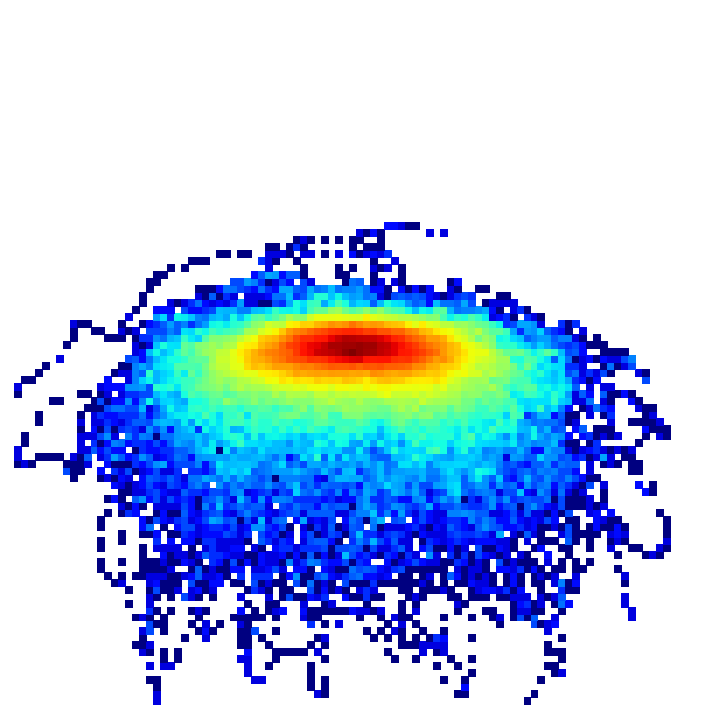

In [26]:
from matplotlib import colors
import matplotlib.patches as patches

colormap='jet'
figscale=1
r=1

fig, ax = plt.subplots(tight_layout=True,figsize=(10*figscale, 10*figscale), frameon=False)
fig.patch.set_visible(False)
# ax.axis('off')
hist = ax.hist2d(df['movedX'], df['movedY'], 
        bins=(100,100), 
        range=[[-r,r],[-r,r]], 
        norm=colors.LogNorm(), cmap=colormap)

# ft to meters conversion
fourFT = 1.2192
rect = patches.Rectangle((-fourFT/2, -fourFT/2),fourFT,fourFT,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
# ax.add_patch(rect)
plt.axis('off')
# plt.show()
plt.savefig('playspace_side_view.png', transparent=True)